link : https://www.kaggle.com/c/tabular-playground-series-jul-2021/data?select=train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [4]:
df.shape

(7111, 12)

In [5]:
df.dropna(axis=1)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [6]:
df.dtypes

date_time                  object
deg_C                     float64
relative_humidity         float64
absolute_humidity         float64
sensor_1                  float64
sensor_2                  float64
sensor_3                  float64
sensor_4                  float64
sensor_5                  float64
target_carbon_monoxide    float64
target_benzene            float64
target_nitrogen_oxides    float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

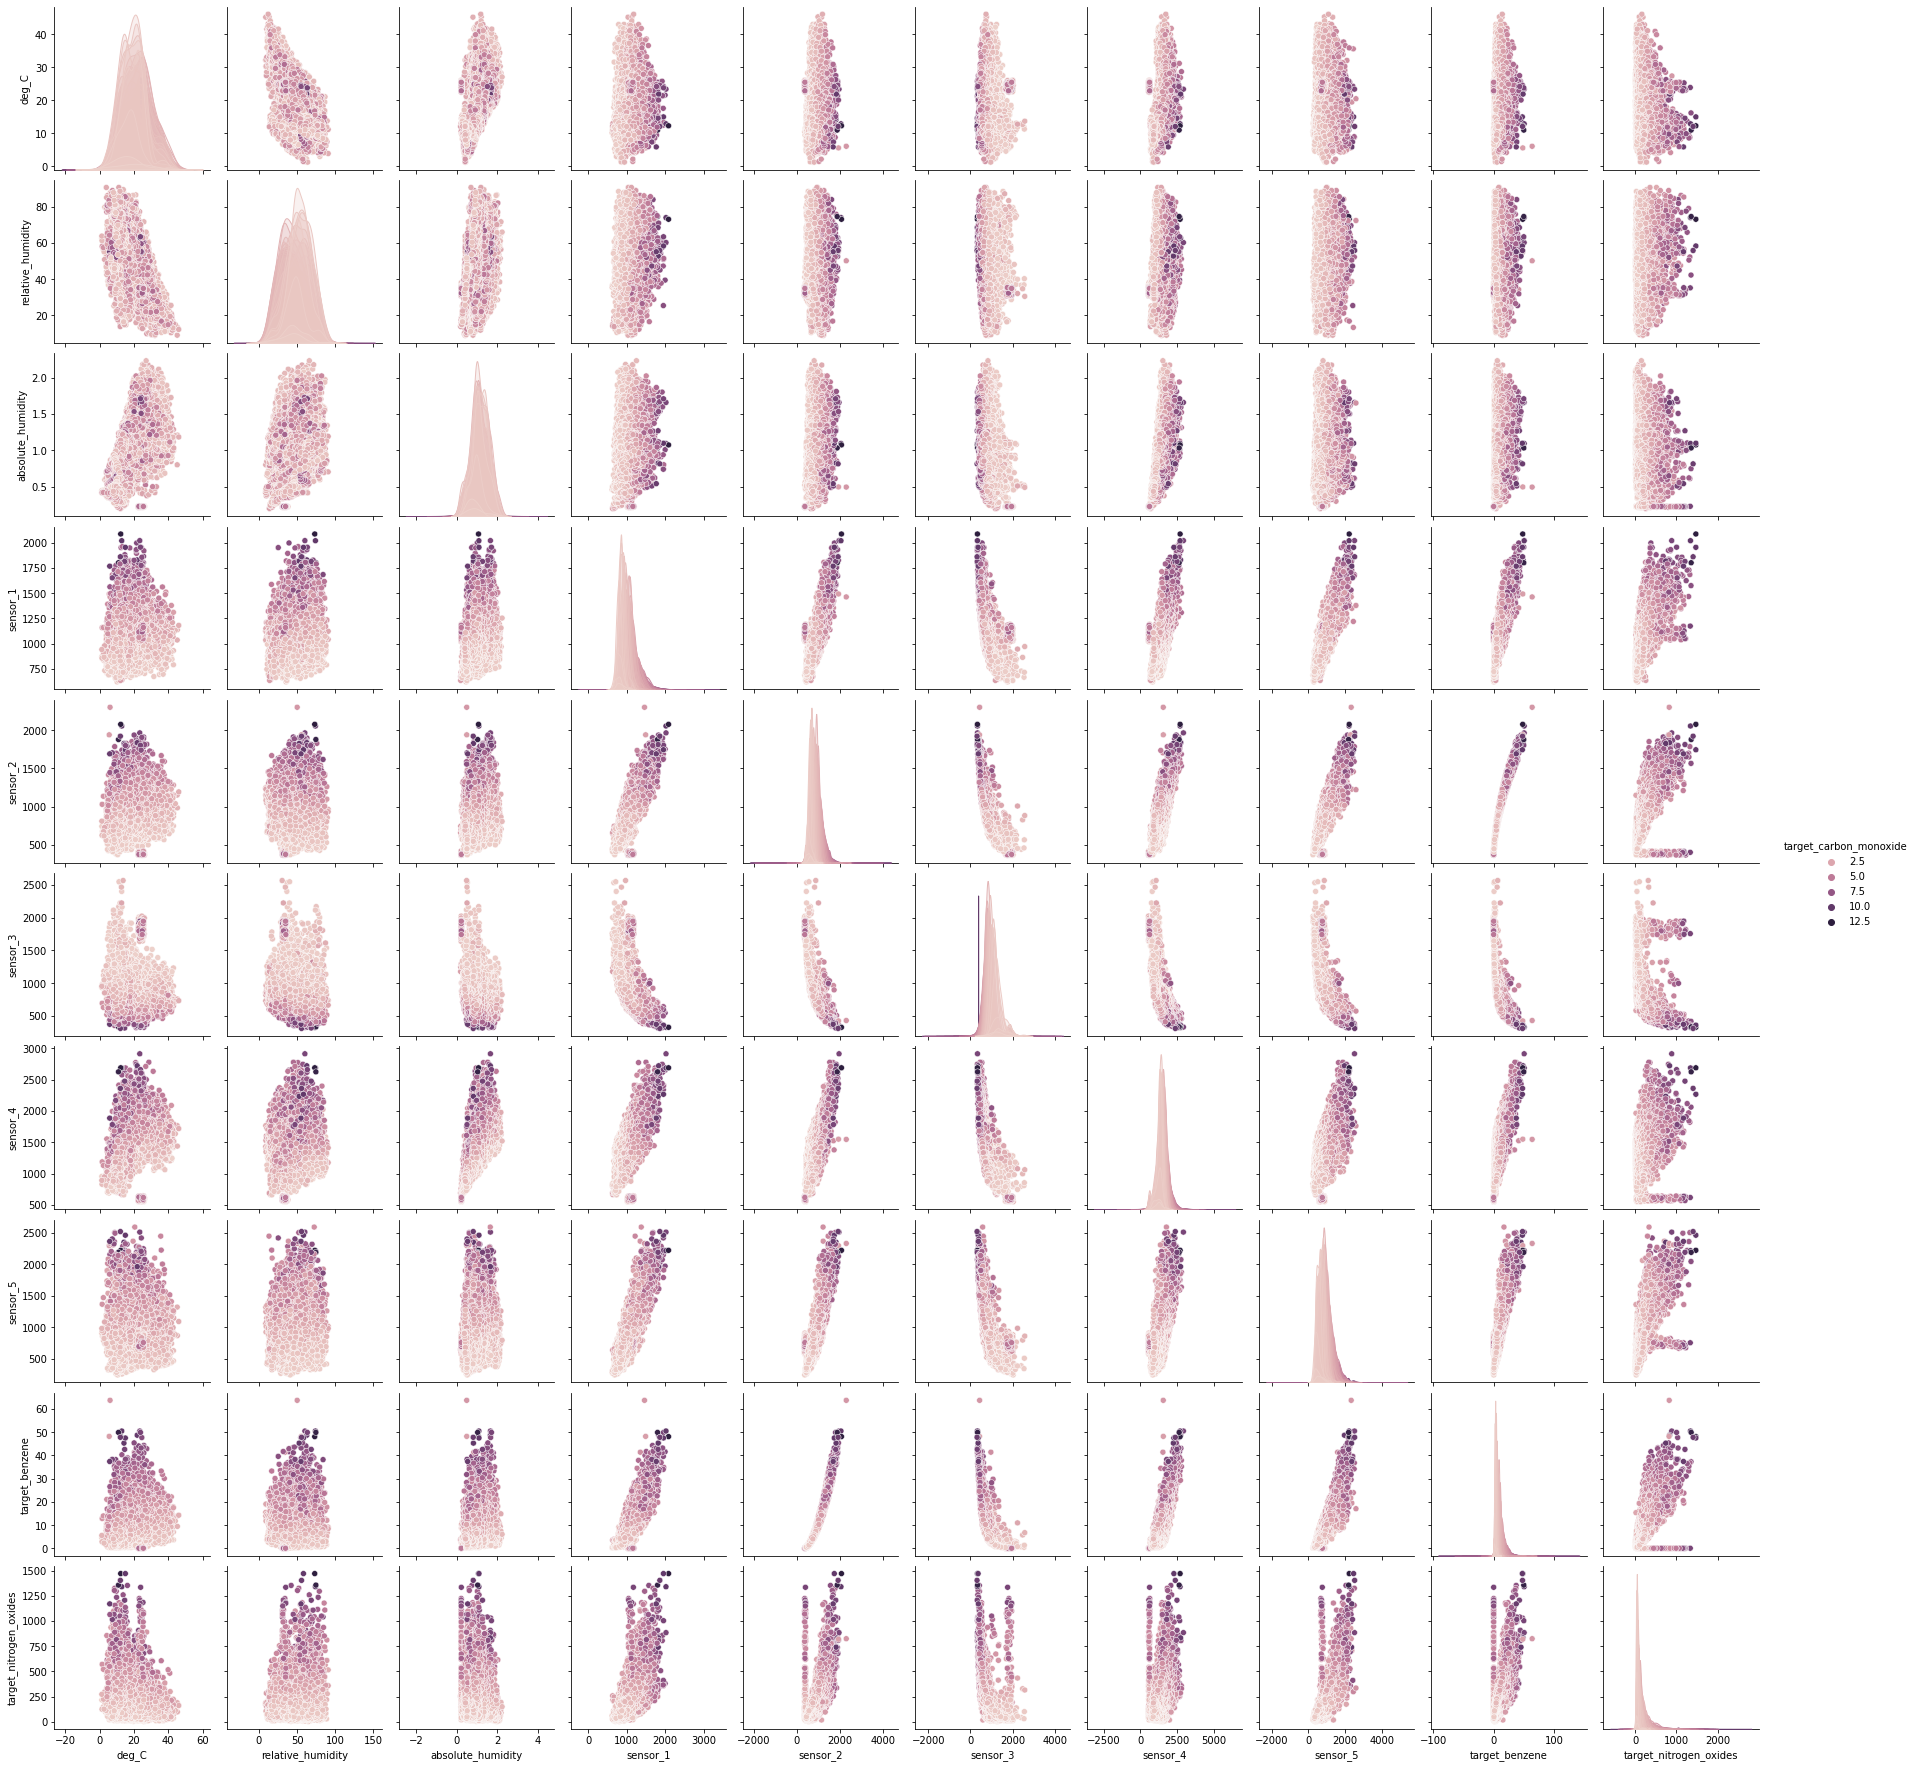

In [8]:
sns.pairplot(df,hue='target_carbon_monoxide')

In [9]:
df.corr()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
deg_C,1.000000,-0.668002,0.445162,0.017513,0.133167,-0.145437,0.308202,-0.050567,-0.007503,0.109757,-0.205984
relative_humidity,-0.668002,1.000000,0.249013,0.093130,-0.035152,-0.102146,0.027002,0.126466,0.016589,-0.022895,0.178608
absolute_humidity,0.445162,0.249013,1.000000,0.105977,0.236894,-0.485445,0.567376,0.124945,-0.013756,0.186293,-0.101911
sensor_1,0.017513,0.093130,0.105977,1.000000,0.811898,-0.592233,0.643191,0.860849,0.857215,0.842534,0.643044
sensor_2,0.133167,-0.035152,0.236894,0.811898,1.000000,-0.819334,0.812454,0.863464,0.821025,0.964440,0.604795
sensor_3,-0.145437,-0.102146,-0.485445,-0.592233,-0.819334,1.000000,-0.741439,-0.706006,-0.547567,-0.735545,-0.427622
sensor_4,0.308202,0.027002,0.567376,0.643191,0.812454,-0.741439,1.000000,0.641120,0.571412,0.783750,0.235662
sensor_5,-0.050567,0.126466,0.124945,0.860849,0.863464,-0.706006,0.641120,1.000000,0.834501,0.877662,0.708270
target_carbon_monoxide,-0.007503,0.016589,-0.013756,0.857215,0.821025,-0.547567,0.571412,0.834501,1.000000,0.881884,0.806099
target_benzene,0.109757,-0.022895,0.186293,0.842534,0.964440,-0.735545,0.783750,0.877662,0.881884,1.000000,0.664235


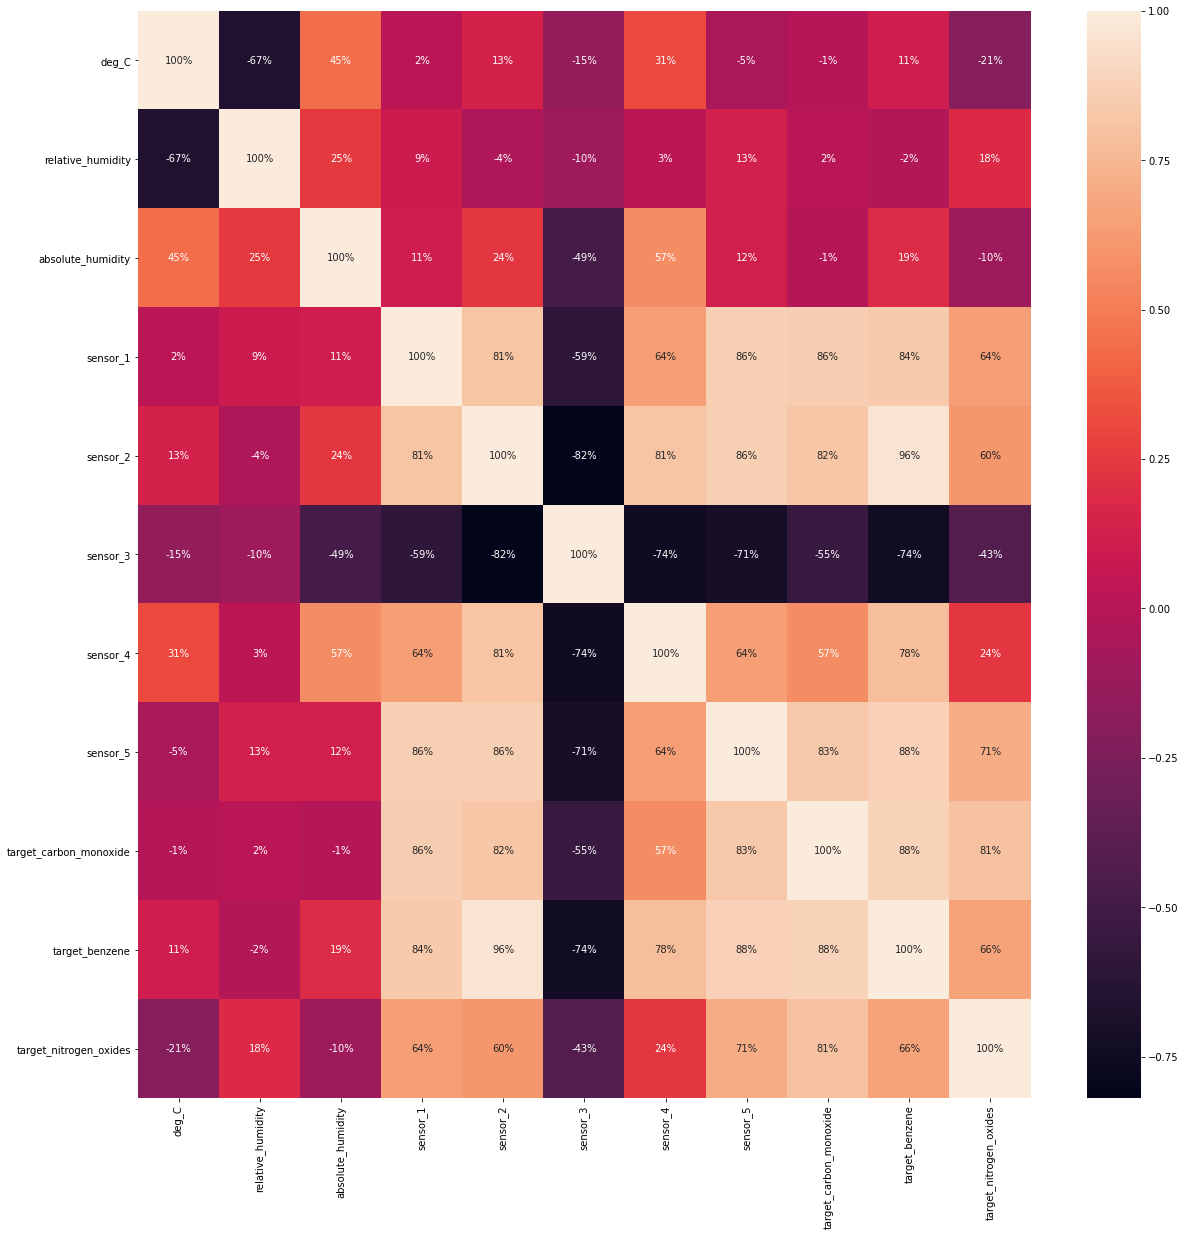

In [10]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [24]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

In [17]:
#targets = ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']

In [19]:
#X = df.drop(['date_time','target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1)

In [1]:
#y = df[targets]
#y

NameError: ignored

In [25]:
#reg1 = LinearRegression().fit(X, y.iloc[:, 0])
#reg2 = LinearRegression().fit(X, y.iloc[:, 1])
#reg3 = LinearRegression().fit(X, y.iloc[:, 2])

In [27]:
#train = pd.read_csv('train.csv')

In [29]:
#X_test = train.drop('date_time',axis=1)

In [11]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [12]:
data = pd.read_csv('train.csv')

In [13]:
tar = ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']

In [14]:
from pycaret.regression import *
s = setup(data =  data, target='target_carbon_monoxide', train_size=0.7, silent=True,remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore')

,Description,Value
0,session_id,635
1,Target,target_carbon_monoxide
2,Original Data,"(7111, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4728, 53)"


In [15]:
cm = compare_models() #outliers and normaisation

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2069,0.1060,0.3253,0.9436,0.0926,0.1323,2.528
lightgbm,Light Gradient Boosting Machine,0.2086,0.1077,0.3279,0.9425,0.0914,0.1313,0.252
rf,Random Forest Regressor,0.2210,0.1210,0.3476,0.9356,0.0994,0.1418,3.715
gbr,Gradient Boosting Regressor,0.2270,0.1210,0.3476,0.9355,0.1029,0.1524,1.226
knn,K Neighbors Regressor,0.2472,0.1323,0.3637,0.9293,0.1066,0.1556,0.133
lr,Linear Regression,0.2621,0.1564,0.3948,0.9168,0.1215,0.1849,0.297
ridge,Ridge Regression,0.2619,0.1565,0.3950,0.9168,0.1215,0.1847,0.018
br,Bayesian Ridge,0.2616,0.1565,0.3950,0.9168,0.1213,0.1844,0.030
huber,Huber Regressor,0.2460,0.1753,0.4164,0.9071,0.1170,0.1597,0.233
omp,Orthogonal Matching Pursuit,0.2940,0.2019,0.4480,0.8927,0.1317,0.1982,0.020


In [16]:
s2 = setup(data =  data, target='target_benzene', train_size=0.7, silent=True)

,Description,Value
0,session_id,4303
1,Target,target_benzene
2,Original Data,"(7111, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4977, 54)"


In [17]:
cm2 = compare_models() #extra tree regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.391000e-01,1.206200e+00,1.094900e+00,9.796000e-01,0.0847,8.330000e-02,2.726
lightgbm,Light Gradient Boosting Machine,7.363000e-01,1.241300e+00,1.110500e+00,9.791000e-01,0.0859,1.048000e-01,0.185
rf,Random Forest Regressor,7.586000e-01,1.303400e+00,1.138500e+00,9.780000e-01,0.0862,8.400000e-02,3.784
gbr,Gradient Boosting Regressor,7.870000e-01,1.301900e+00,1.139500e+00,9.779000e-01,0.0938,1.407000e-01,1.282
lr,Linear Regression,9.732000e-01,1.933400e+00,1.381300e+00,9.676000e-01,0.2232,6.267000e-01,0.031
ridge,Ridge Regression,9.733000e-01,1.933700e+00,1.381400e+00,9.675000e-01,0.2232,6.271000e-01,0.028
br,Bayesian Ridge,9.727000e-01,1.934300e+00,1.381700e+00,9.675000e-01,0.2233,6.319000e-01,0.042
knn,K Neighbors Regressor,9.565000e-01,2.100300e+00,1.443800e+00,9.645000e-01,0.1148,1.084000e-01,0.097
ada,AdaBoost Regressor,1.198700e+00,2.428000e+00,1.556800e+00,9.587000e-01,0.2928,1.118500e+00,0.563
omp,Orthogonal Matching Pursuit,1.142800e+00,2.590100e+00,1.602100e+00,9.564000e-01,0.2664,8.620000e-01,0.029


In [20]:
s3 = setup(data =  data, target='target_nitrogen_oxides', train_size=0.7, silent=True)

,Description,Value
0,session_id,7233
1,Target,target_nitrogen_oxides
2,Original Data,"(7111, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4977, 54)"


In [21]:
cm3 = compare_models() #extra tree regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,27.1531,2.265087e+03,47.3133,0.9386,0.1998,0.1583,2.871
lightgbm,Light Gradient Boosting Machine,28.3760,2.347760e+03,48.2509,0.9359,0.2109,0.1701,0.227
rf,Random Forest Regressor,29.7309,2.630038e+03,51.0701,0.9280,0.2131,0.1718,4.351
gbr,Gradient Boosting Regressor,32.7358,2.980717e+03,54.4185,0.9187,0.2396,0.1963,1.240
dt,Decision Tree Regressor,42.6798,5.497583e+03,73.5901,0.8488,0.3058,0.2393,0.094
ridge,Ridge Regression,51.3613,5.642706e+03,74.9600,0.8461,0.6173,0.4562,0.028
br,Bayesian Ridge,51.2812,5.642145e+03,74.9519,0.8461,0.6137,0.4538,0.041
lr,Linear Regression,51.3828,5.644503e+03,74.9725,0.8460,0.6180,0.4567,0.294
lasso,Lasso Regression,52.8652,6.107812e+03,77.9194,0.8337,0.6096,0.4425,0.045
omp,Orthogonal Matching Pursuit,53.7095,6.560227e+03,80.8460,0.8215,0.6256,0.4447,0.028
